In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
from IPython.display import HTML

In [40]:
df = pd.read_csv('111.csv')

In [41]:
df.head(5) #读前5行数据

,name,group,year,value
0,kaiachi,Asia,1500,16162.29
1,cairo,Middle East,1500,15363.53
2,beijing,Asia,1500,14061.42
3,New York,North America,1500,11696.00
4,osaka,Asia,1500,17421.27


In [42]:
current_year = 1996
dff = (df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).head(10))   #读出1996年份的数据并按 ’value‘ 从小到大排序

In [43]:
dff

,name,group,year,value
2978,beijing,Asia,1996,23062.01
2979,New York,North America,1996,23696.02
2981,shanghai,Asia,1996,25522.82
2977,cairo,Middle East,1996,28359.92
2976,kaiachi,Asia,1996,28690.73
2980,osaka,Asia,1996,29541.79


<BarContainer object of 6 artists>

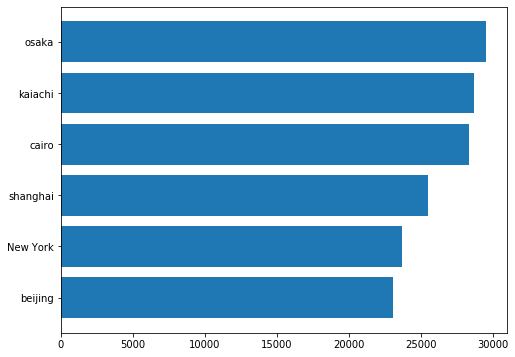

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))  #指定生成图形的大小
ax.barh(dff['name'], dff['value'])  #填充数据

In [45]:
colors = dict(zip(
    ['North America', 'Asia', 'Middle East'],
    ['#adb0ff', '#ffb3ff', '#90d595']
)) #指定各个地区对应的颜色 生成字典
group_lk = df.set_index('name')['group'].to_dict() #让名字和分组对应生成字典

In [46]:
group_lk

{'kaiachi': 'Asia',
 'cairo': 'Middle East',
 'beijing': 'Asia',
 'New York': 'North America',
 'osaka': 'Asia',
 'shanghai': 'Asia'}

In [47]:
colors

{'North America': '#adb0ff', 'Asia': '#ffb3ff', 'Middle East': '#90d595'}

In [48]:
dff = dff[::-1]   # 从上到下翻转值

In [49]:
color=[x for x in dff['name']]
print(color)

['osaka', 'kaiachi', 'cairo', 'shanghai', 'New York', 'beijing']


In [51]:
color=[colors[group_lk[x]] for x in dff['name']]  #获取数据中每个分钟对应的颜色
print(color)

['#ffb3ff', '#ffb3ff', '#90d595', '#ffb3ff', '#adb0ff', '#ffb3ff']


Text(1, 0.4, '1996')

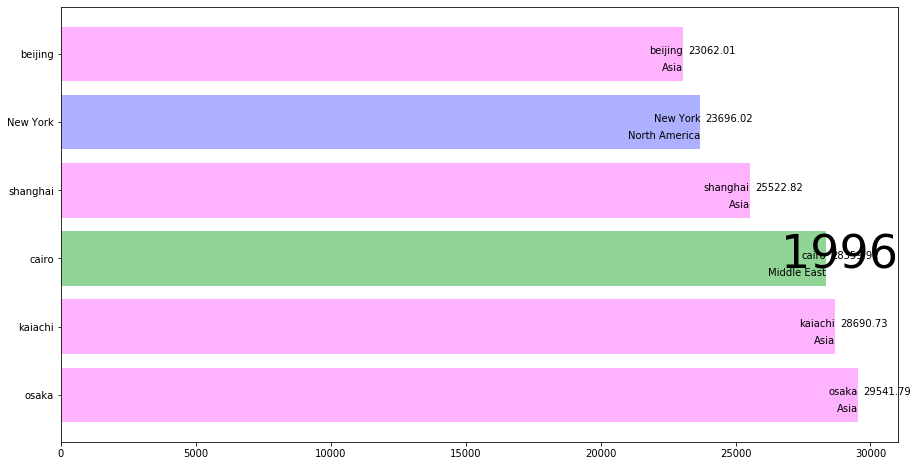

In [76]:
fig, ax = plt.subplots(figsize=(15, 8))
# 将颜色值传递给`color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# 遍历这些值来绘制标签和值(Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,name, ha='right')  # Tokyo: 名字
    ax.text(value, i-0.25, group_lk[name], ha='right')  # Asia: 组名  i-.25'为坐标往下偏移  ha='' 为  显示的
    ax.text(value+200, i, value, ha='left')   # 38194.2: 值  ‘value+200’为坐标向右偏移
# 在画布右方添加年份
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

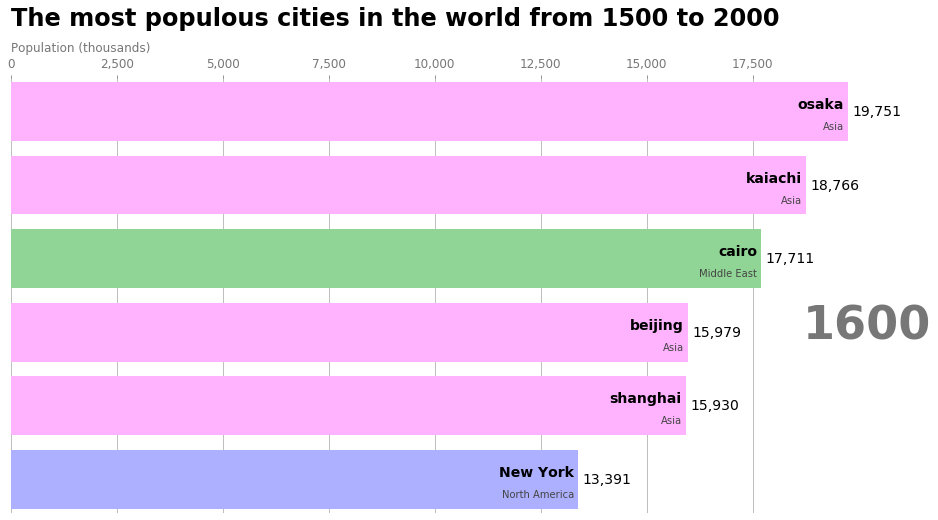

In [135]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10) #选取满足条件的后10行
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])  #获取数据中每个分钟对应的颜色 并设置
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):  #配置数据及显示的格式
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline') # Asia: 组名  i-.25'为坐标往下偏移  ha='' 为  显示的位置
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')  # value+dx’为坐标向右偏移
    # ... polished styles
    ax.text(1.1, 0.4, year, color='#777777',transform=ax.transAxes, size=46, ha='right', weight=800) #设置年份的显示位置，颜色，大小，字体粗度
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777') #这里的,transform=axs.transAxes就是轴坐标，大概意思就是左边距离横坐标轴长的0.1倍，下面距离纵坐标轴的0.90倍，如果不写的话默认就是data坐标，即0.1代表横轴的0.1个单位，即坐标点
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))#x 轴坐标参数 改为 19,751 格式
    ax.xaxis.set_ticks_position('top')#x 轴坐标参数 x轴显示到上方
    ax.tick_params(axis='x', colors='#777777', labelsize=12) #x 轴坐标参数 颜色，大小
    ax.set_yticks([]) #不显示y 轴
    ax.margins(0, 0.01) #缩放坐标
    ax.grid(which='major', axis='x', linestyle='-') #设置坐标竖线
    ax.set_axisbelow(True) #设置坐标为背景
    ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2000',
            transform=ax.transAxes, size=24, weight=600, ha='left')  #加标题
#     ax.text(1, 0, 'by QIML', transform=ax.transAxes, ha='right',
#             color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(1600)

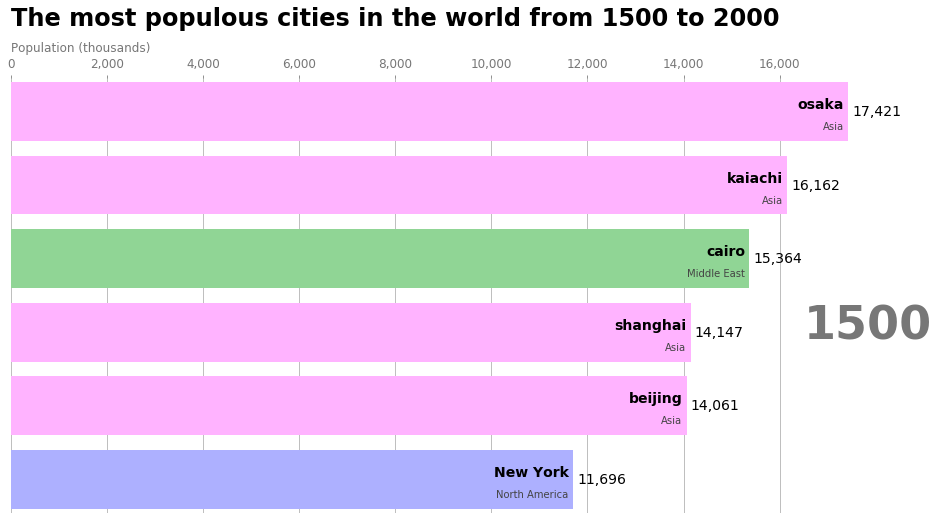

In [140]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, range(1500, 1800))
HTML(animator.to_jshtml())
# plt.show()